In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_images.shape)
print(len(train_labels))

(60000, 28, 28)
60000


In [4]:
print(test_images.shape)
print(test_labels.shape)
print(len(test_labels))

(10000, 28, 28)
(10000,)
10000


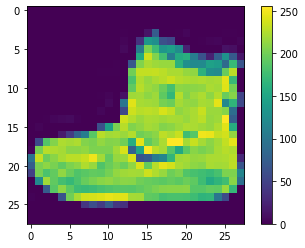

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
# 这些图片的像素值在0-255之间， 除以255将值缩放到0-1之间， 对训练集和测试集要以相同的方式进行预处理
train_images = train_images / 255.0
test_images = test_images / 255.0

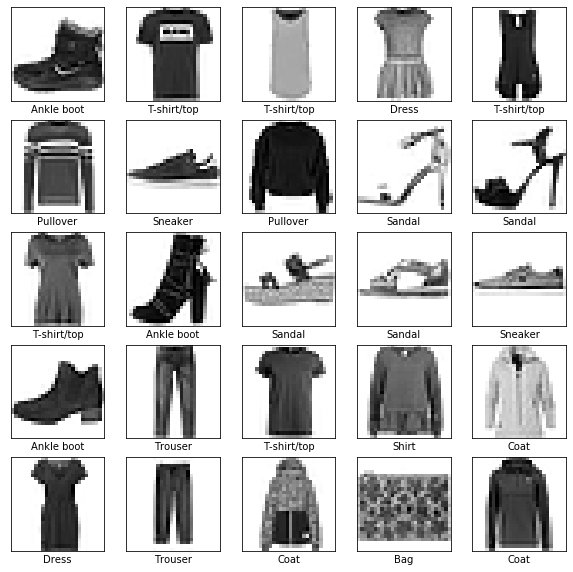

In [7]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),     #将28*28的图片展平为784像素的一维数组
    keras.layers.Dense(128, activation=tf.nn.relu), #全连接层：包含128个神经元，采用relu激活函数
    keras.layers.Dense(10, activation=tf.nn.softmax)#全连接层：包含10个神经元，采用softmax激活函数，返回包含10个概率分数的数组，总和为1
])

# 进行训练之前 需要编译模型， 设置优化器、损失函数、评价方式
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

W0807 10:36:03.370184 4390892992 deprecation.py:506] From /Users/skylar/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
# 训练模型， 对训练数据进行”拟合“
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5017 - acc: 0.8242
Epoch 2/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3729 - acc: 0.8652
Epoch 3/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3351 - acc: 0.8789
Epoch 4/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3098 - acc: 0.8861
Epoch 5/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2946 - acc: 0.8918


In [11]:
# 过拟合：指机器学习模型在新数据上的表现比在训练数据上表现更差
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.3397 - acc: 0.8794
Test accuracy: 0.8794


In [12]:
predictions = model.predict(test_images)
predictions[0]

array([8.8536035e-06, 1.0678526e-07, 1.2582325e-06, 5.5704987e-08,
       8.1099807e-07, 1.9397002e-02, 8.8765773e-07, 6.9614284e-02,
       1.6888191e-05, 9.1095978e-01], dtype=float32)

In [13]:
np.argmax(predictions[0])

9

In [14]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
    

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

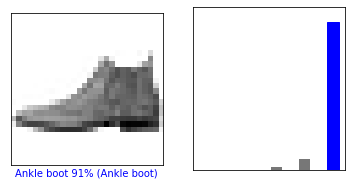

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

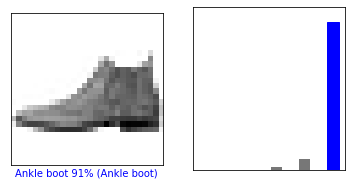

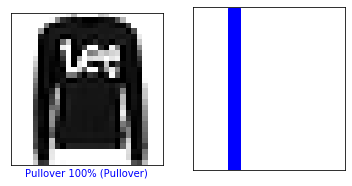

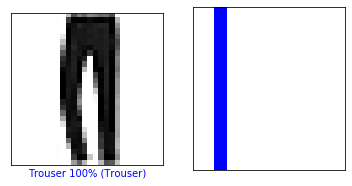

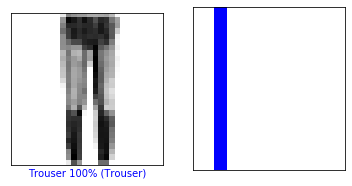

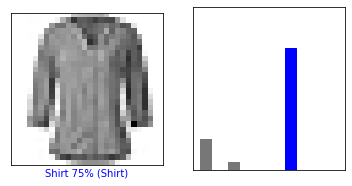

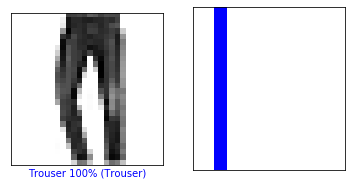

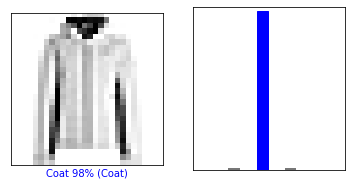

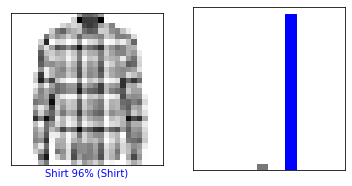

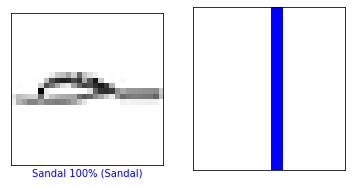

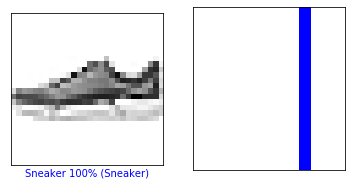

In [23]:
for i in range(10):
    plt.figure(figsize=(6,3))
    plt.subplot(1, 2, 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(1, 2, 2)
    plot_value_array(i, predictions, test_labels)
    plt.show()

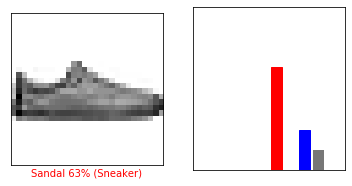

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

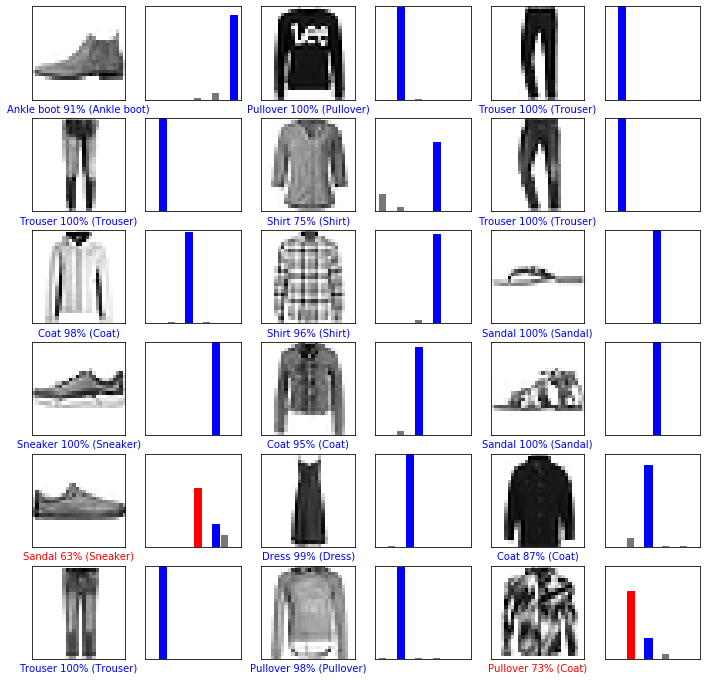

In [26]:
def showResult(num_rows, num_cols):
    num_images = num_rows * num_cols
    plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 1 )
        plot_image(i, predictions, test_labels, test_images)
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
        plot_value_array(i, predictions, test_labels)
    plt.show()
    
showResult(6,3)

In [27]:
# 最后，使用训练的模型对单个图像进行预测
img = test_images[0]
print(img.shape)

(28, 28)


In [28]:
# tf.keras模型经过优化后，可以一次性对批量或者一个集合的数据进行预测， 使用单个图像，也需要添加到列表中
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = model.predict(img)
print(predictions_single)

[[8.8535789e-06 1.0678538e-07 1.2582303e-06 5.5704891e-08 8.1099660e-07
  1.9396972e-02 8.8765620e-07 6.9614246e-02 1.6888145e-05 9.1095990e-01]]


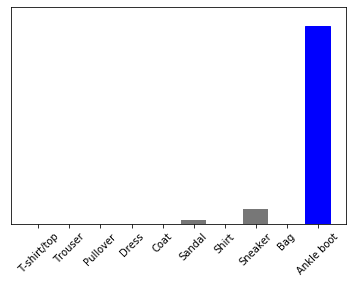

In [30]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()